# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

# **Course 3 End-of-course project: Exploratory data analysis**

<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset. This activity has 4 parts:

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration, Data cleaning

**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

<br/>

# **Visualize a story in Python**

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')
df=df.dropna()


### Data exploration and cleaning






#### **Data overview and summary statistics**

In [4]:
df.shape

(14999, 13)

In [12]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Generate summary statistics using the `describe()` method.

In [13]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Consider the following questions as you prepare to deal with outliers:

1.   What are some ways to identify outliers?
2.   How do you make the decision to keep or exclude outliers from any future models?

1. Outliers are a model-dependent notion, so it is important to visualise the data or at least keep track of the number of supposed outliers during exploratory data analysis. If we assume symmetrical distributions with subgaussian tails, we can look at the min-max-avg-std values. If we have a guess on the distribution type, we can explore the QQ plot or influence function for the data point. In a broader sense, we simply need to estimate the tails of the distribution.
2. There is a trade-off between the robustness of the model and our capacity to keep outliers. A small dataset filled with potential outliers may force us to select a robust model while keeping outliers, but a clean, large dataset will allow us to reject potential outliers for a more fine model capable of making more exact predictions.

### Visualizations

Select data visualization types that will help you understand and explain the data.

Begin by examining the spread and distribution of important variables using box plots and histograms.

In [19]:
def get_median(datasource, column_title, round_to_n=1):
    return round(datasource[column_title].median(), round_to_n)

def get_mean(datasource, column_title, round_to_n=1):
    return round(datasource[column_title].mean(), round_to_n)

def print_central_tendency_metrics(datasource, column_title, round_to_n=1):
    median = get_median(datasource, column_title, round_to_n=round_to_n)
    mean = get_mean(datasource, column_title, round_to_n=round_to_n)
    print(f"{column_title}: median = {median}, mean = {mean}")

def boxplotter(datasource, column_title, plot_title=None, **kwargs):
    default_figure_size = (8,2)
    default_flier_size = 3
    plt.figure(figsize=default_figure_size)
    sns.boxplot(x=datasource[column_title], fliersize=default_flier_size)
    if not plot_title:
        plot_title = f'{column_title} box plot'
    plt.title(plot_title)
    
def histplotter(datasource, column_title, plot_title=None, **kwargs):                                                        
    median = get_median(datasource, column_title)
    plt.figure(figsize=(15,5))
    ax = sns.histplot(x=datasource[column_title], **kwargs)            
    plt.axvline(median, color='red', linestyle='--')
    plt.xlabel(column_title)
    plt.ylabel('count')
    if not plot_title:
        plot_title = f'{column_title} histogram'
    plt.title(plot_title)
    

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

sessions: median = 56.0, mean = 80.6


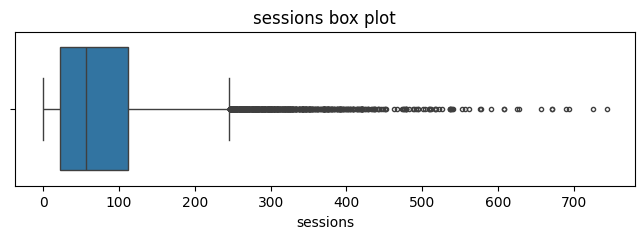

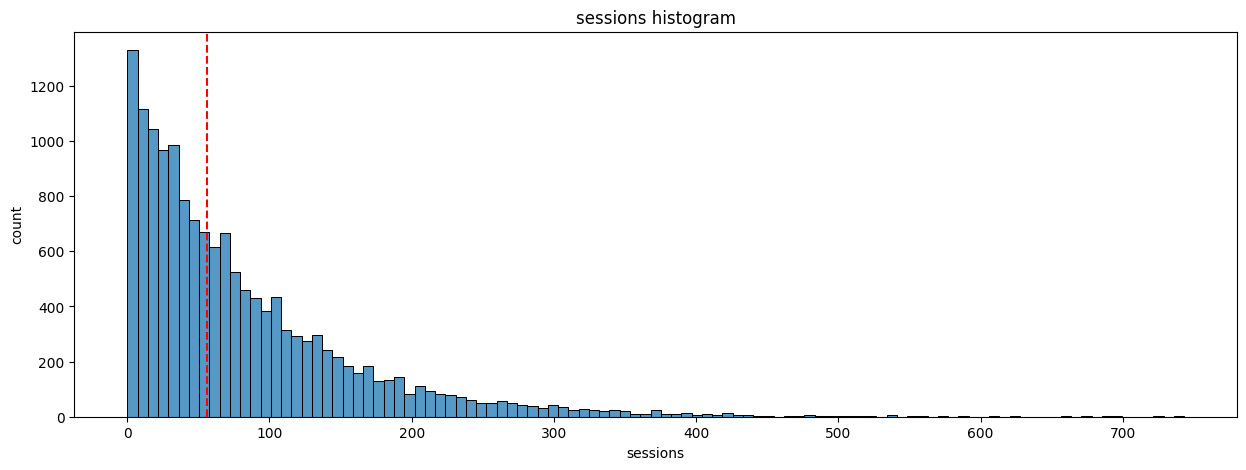

In [21]:
print_central_tendency_metrics(df, 'sessions')
boxplotter(df, 'sessions')
histplotter(df, 'sessions')

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

fitted scale is 80.633775585039


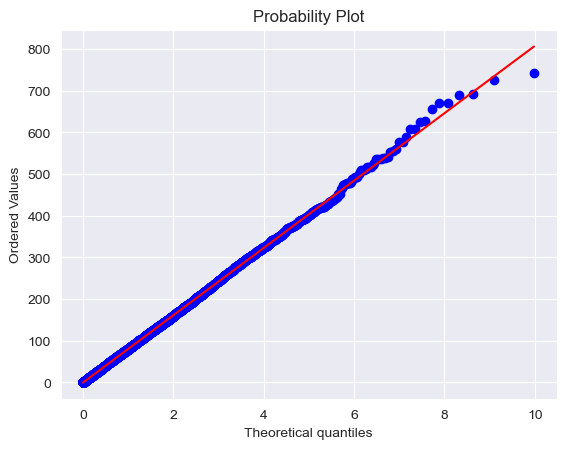

In [5]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
sessions = df.sessions.to_numpy()
loc, scale = stats.expon.fit(sessions)
print(f'fitted scale is {scale}')
stats.probplot(sessions, dist=stats.expon, fit =True,plot=ax)
plt.show()

We notice that exponential distribution perfectly explains the data, with no outliers.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

drives: median = 48.0, mean = 67.3


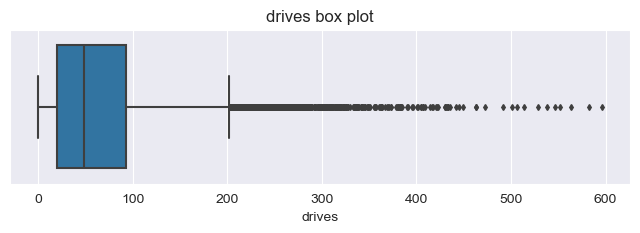

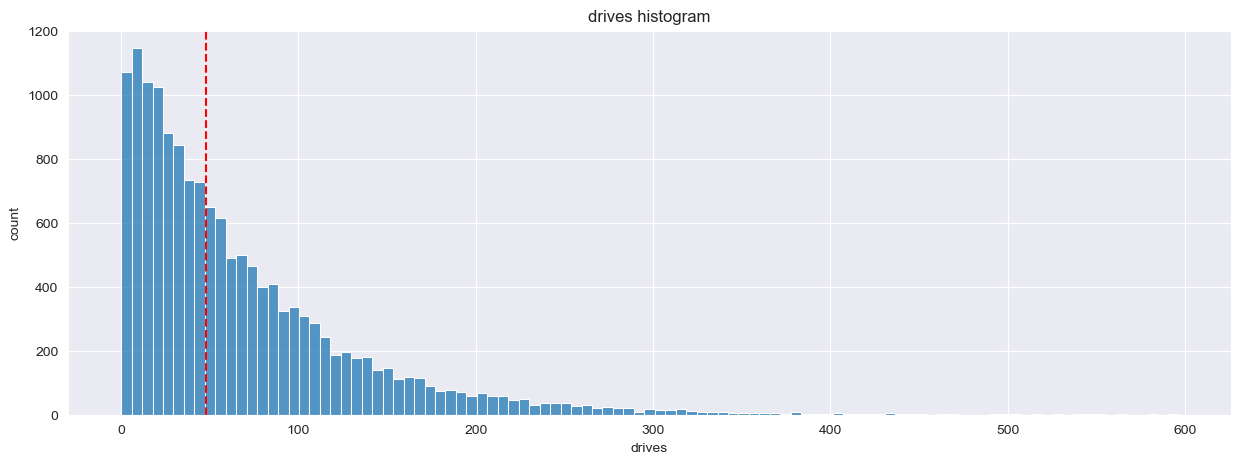

In [20]:
columnn = 'drives'
print_central_tendency_metrics(df, columnn)
boxplotter(df, columnn) 
histplotter(df, columnn)

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

total_sessions: median = 159.6, mean = 190.0


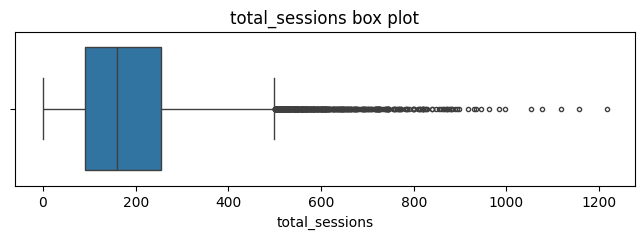

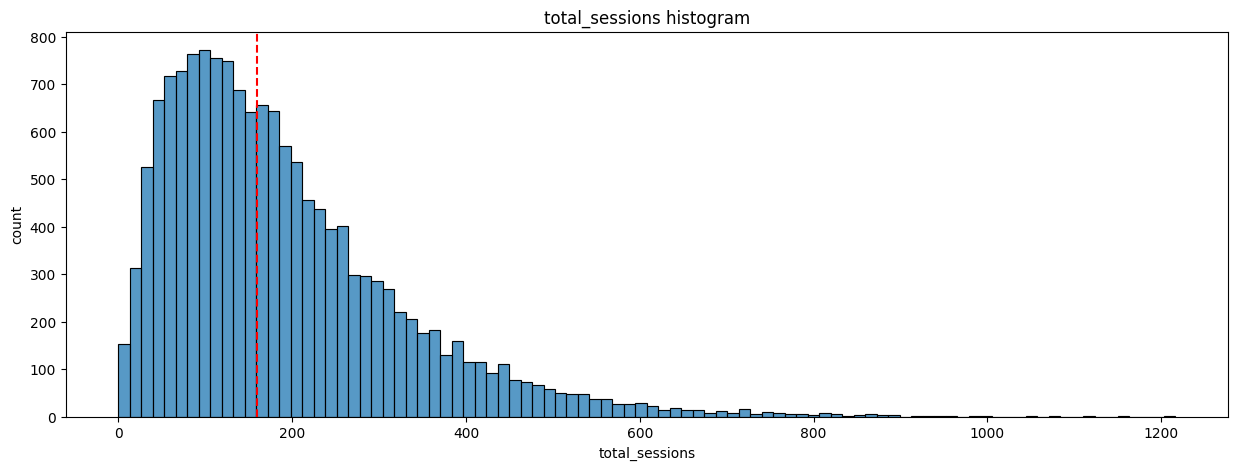

In [33]:
column = 'total_sessions'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

n_days_after_onboarding: median = 1741.0, mean = 1749.8


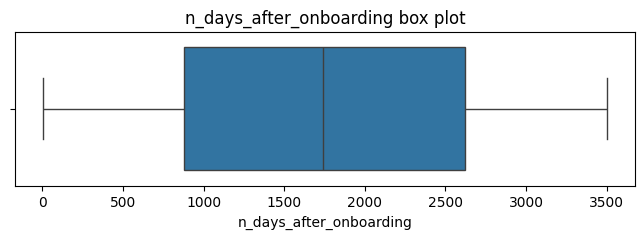

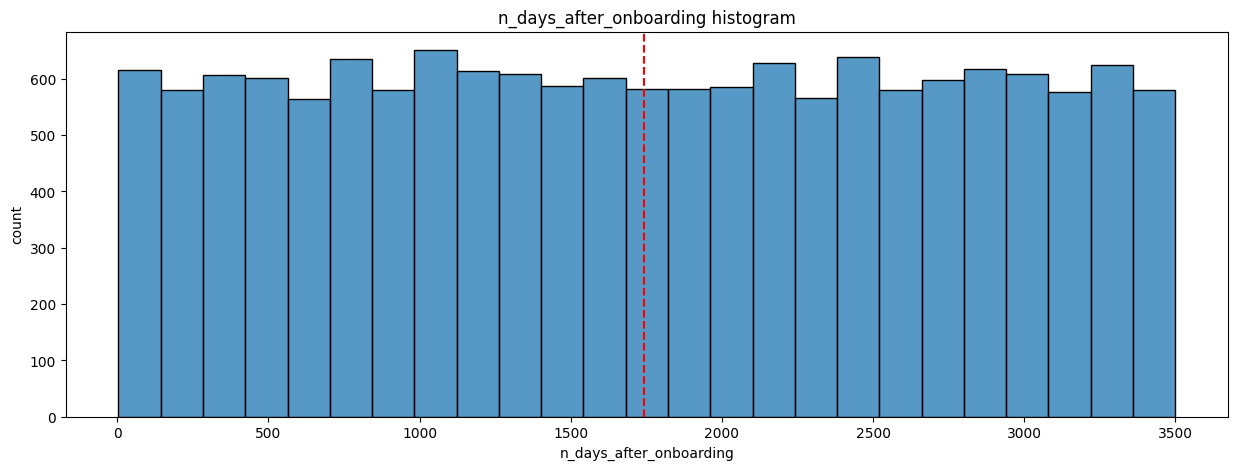

In [32]:
column = 'n_days_after_onboarding'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

driven_km_drives: median = 3493.9, mean = 4039.3


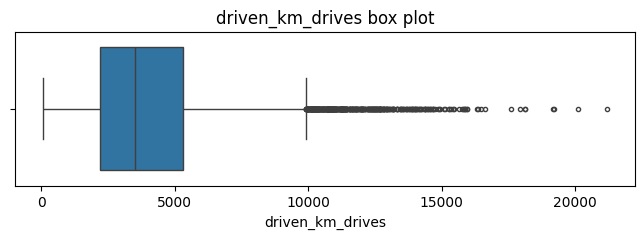

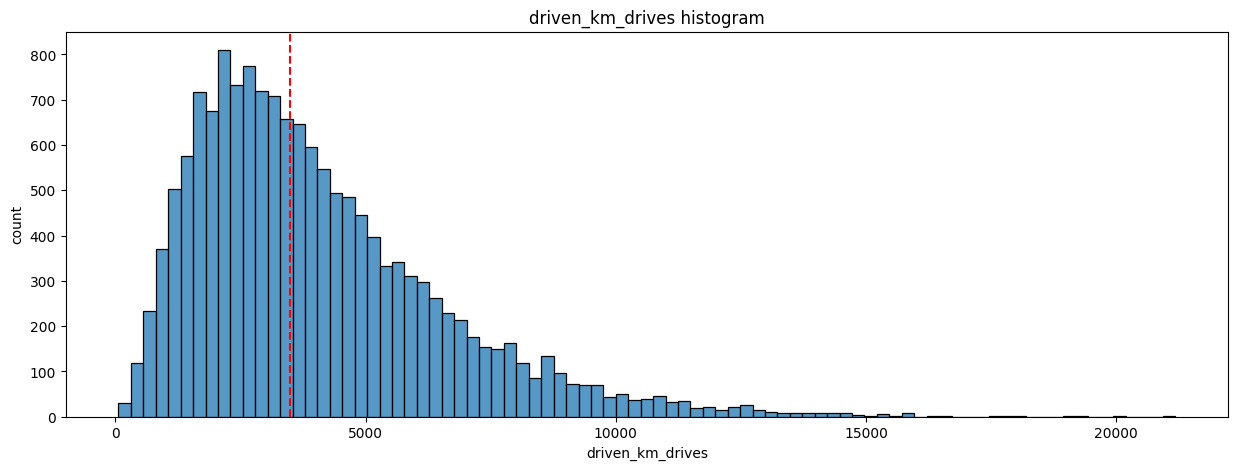

In [31]:
column = 'driven_km_drives'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth, which appears to be a mistake

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

duration_minutes_drives: median = 1478.2, mean = 1861.0


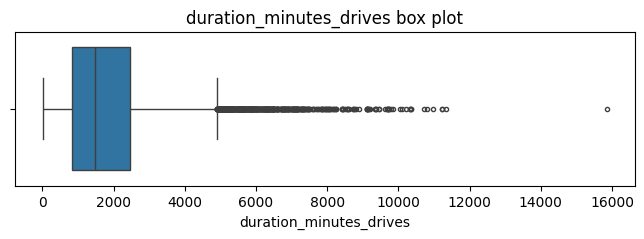

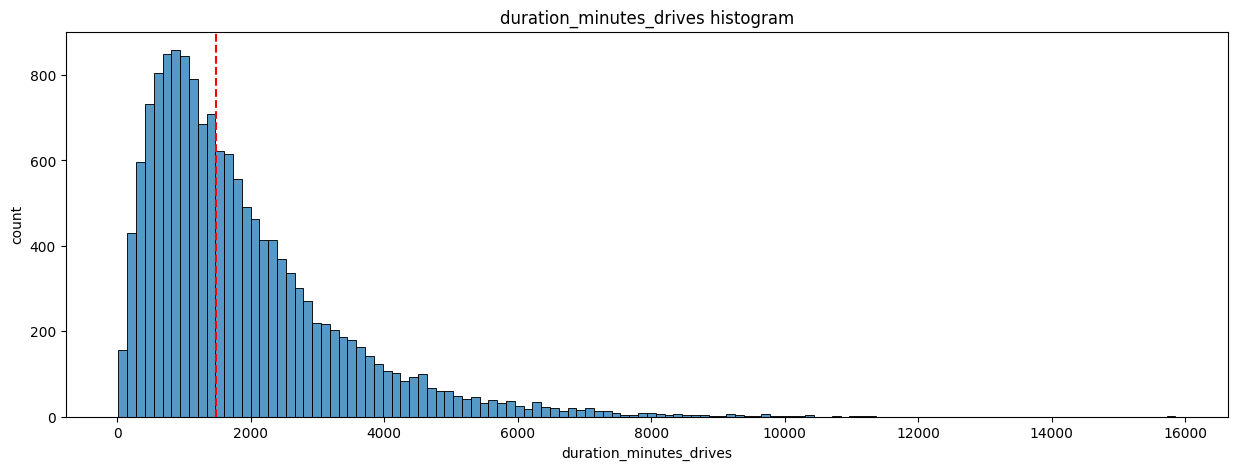

In [36]:
column = 'duration_minutes_drives'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month (which is around 8h daily)

#### **`activity_days`**

_Number of days the user opens the app during the month_

activity_days: median = 16.0, mean = 15.5


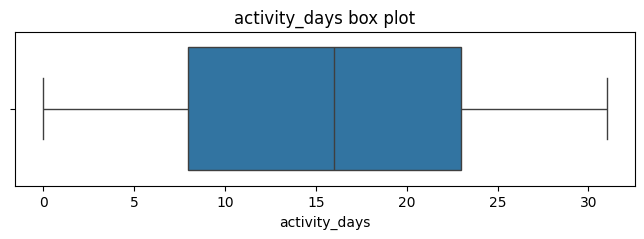

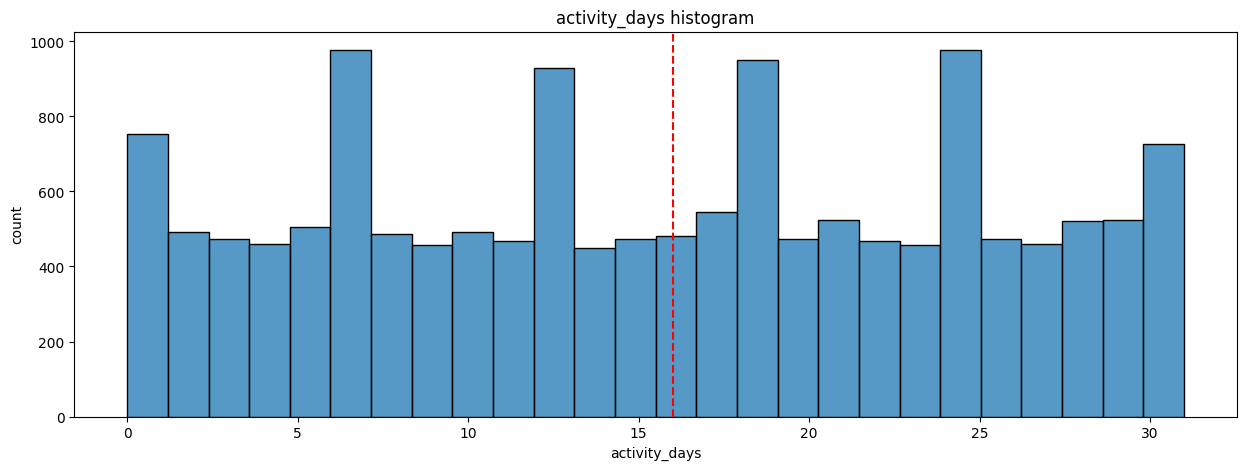

In [37]:
column = 'activity_days'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

driving_days: median = 12.0, mean = 12.2


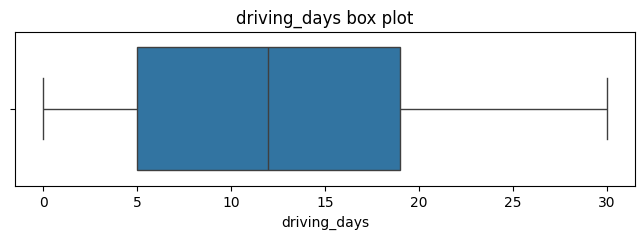

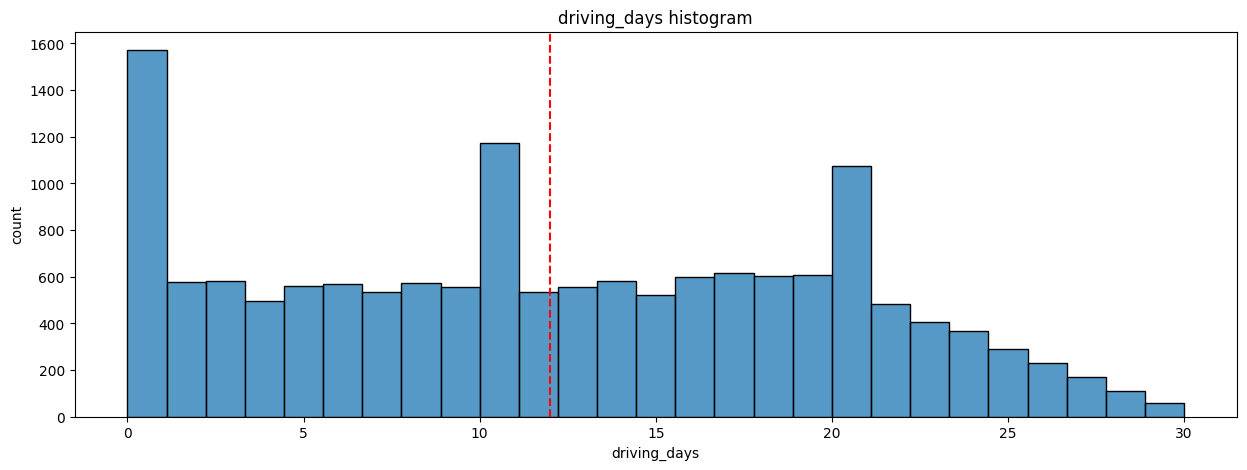

In [38]:
column = 'driving_days'
print_central_tendency_metrics(df, column)
boxplotter(df, column) 
histplotter(df, column)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

In [40]:
def piecharter(datasource, column):
    fig = plt.figure(figsize=(5,5))
    data=datasource[column].value_counts()
    plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
    plt.title(f'Users by {column}');

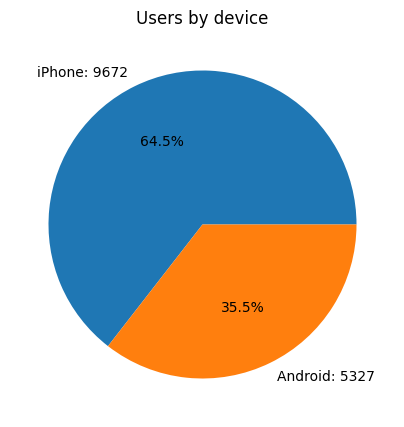

In [41]:
piecharter(df, 'device')


There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

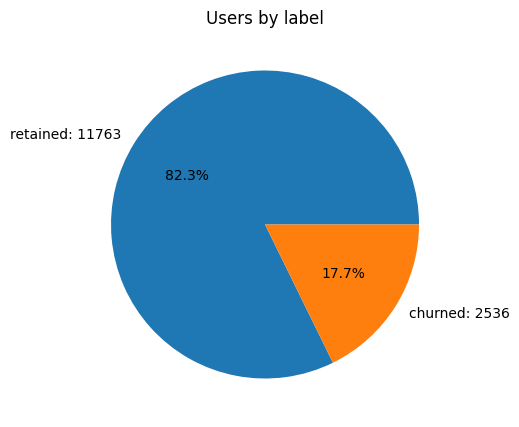

In [42]:
piecharter(df, 'label')

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

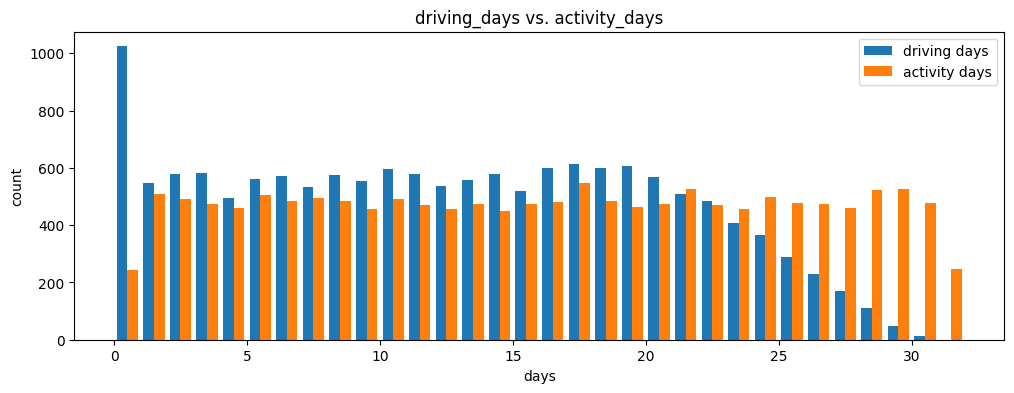

In [43]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [45]:
print(df['driving_days'].max(), df['activity_days'].max())

30 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

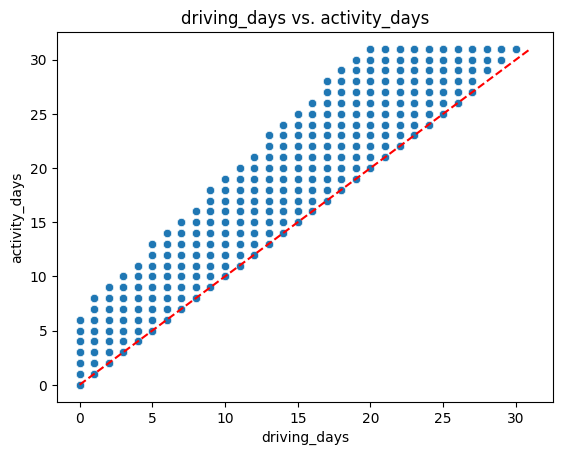

In [46]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

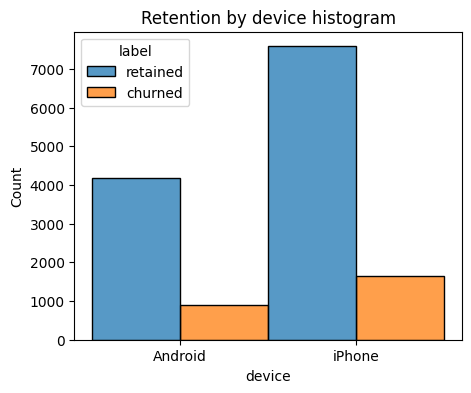

In [47]:
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge'
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, you discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Examine this further.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Call the `describe()` method on the new column.

In [72]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

What do you notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why do you think this is?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [73]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

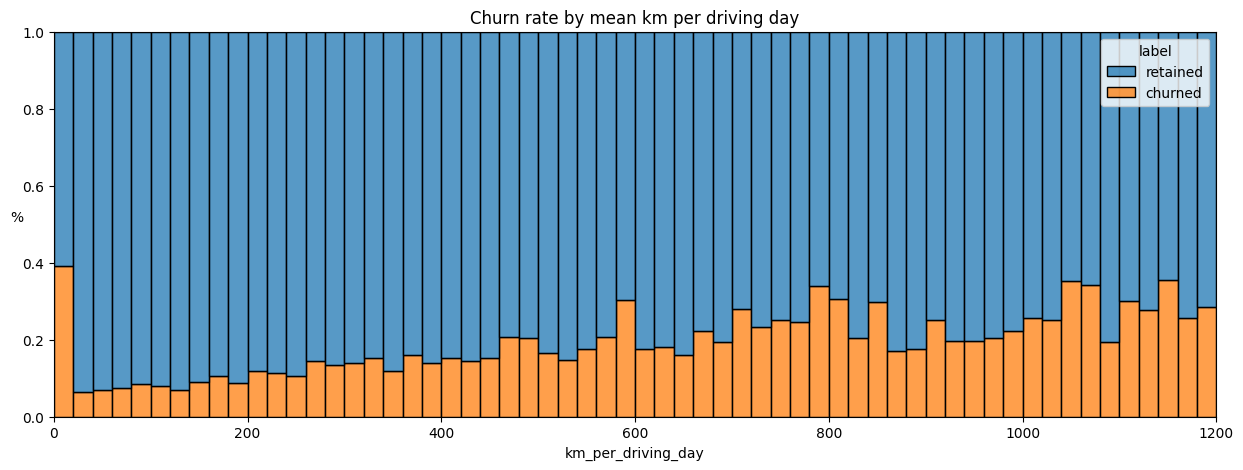

In [74]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

<Axes: xlabel='driving_days', ylabel='Count'>

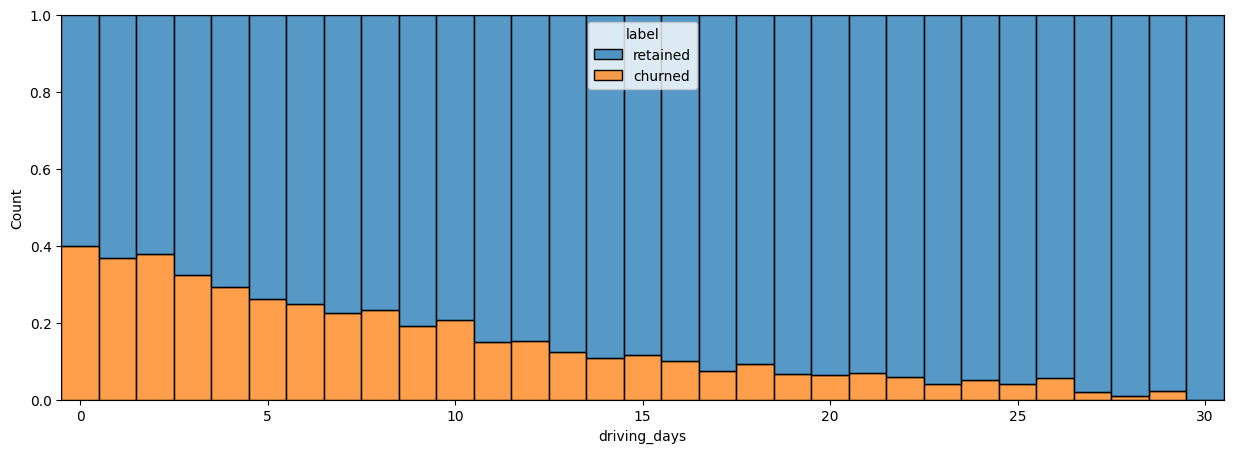

In [52]:
plt.figure(figsize=(15,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(0,32),
             hue='label',
             multiple='fill',
             discrete=True
            )

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [75]:
df['percent_sessions_in_last_month'] = round(df['sessions'] / df['total_sessions'], 2)

What is the median value of the new column?

In [76]:
df['percent_sessions_in_last_month'].median()

0.42

Now, create a histogram depicting the distribution of values in this new column.

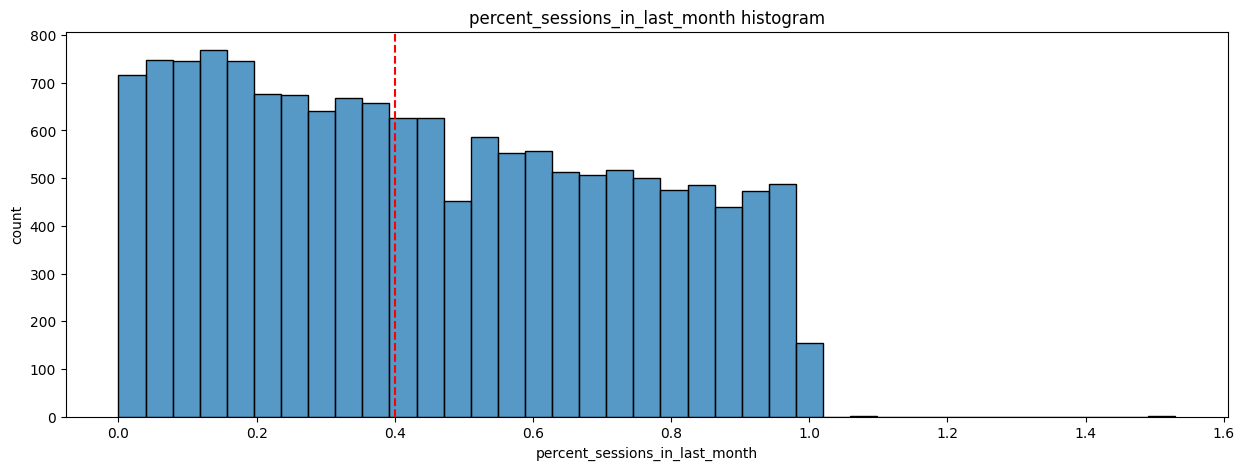

In [57]:
histplotter(df, 'percent_sessions_in_last_month')

Check the median value of the `n_days_after_onboarding` variable.

In [58]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

<Axes: xlabel='n_days_after_onboarding', ylabel='Count'>

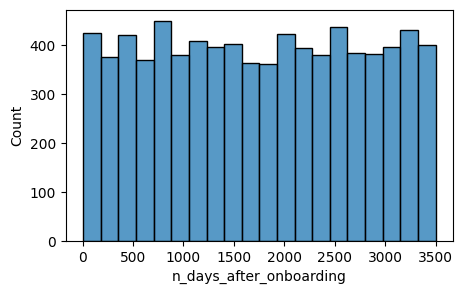

In [59]:
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])


The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### Handling missing data
Remove the missing data

In [77]:
df.dropna(axis=0, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14299 non-null  int64  
 1   label                           14299 non-null  object 
 2   sessions                        14299 non-null  int64  
 3   drives                          14299 non-null  int64  
 4   total_sessions                  14299 non-null  float64
 5   n_days_after_onboarding         14299 non-null  int64  
 6   total_navigations_fav1          14299 non-null  int64  
 7   total_navigations_fav2          14299 non-null  int64  
 8   driven_km_drives                14299 non-null  float64
 9   duration_minutes_drives         14299 non-null  float64
 10  activity_days                   14299 non-null  int64  
 11  driving_days                    14299 non-null  int64  
 12  device                          14299

### Handling outliers

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.



In [79]:
def impute_n_percentile_outliers(column_name, percentile):
    threshold = df[column_name].quantile(percentile)
    df.loc[df[column_name] > threshold, column_name] = threshold

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [80]:
for column in ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']:
    impute_n_percentile_outliers(column, 0.95)

Call `describe()` to see if your change worked.

In [67]:
df.describe()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,0.0,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,NaN,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,NaN,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,NaN,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,NaN,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,NaN,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,NaN,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


<Axes: >

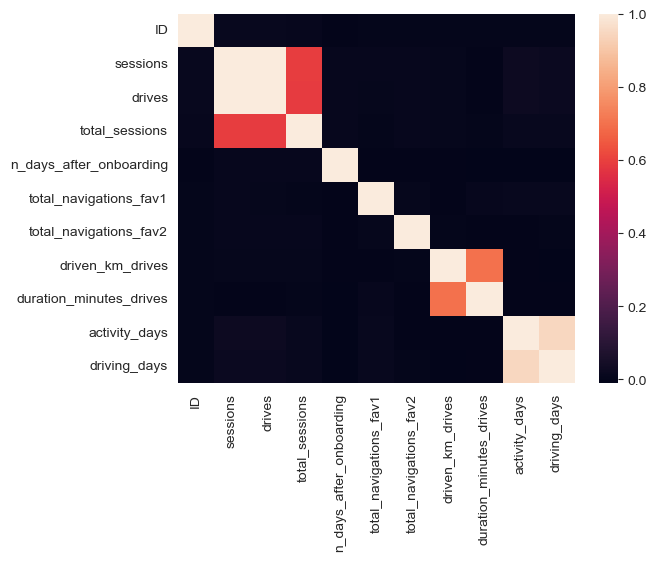

In [5]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

In [17]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import pairwise_logrank_test
kmf = KaplanMeierFitter()
df['label']=df['label'].map({'retained': 0, 'churned': 1}).astype(float)
df=df.dropna()
C=df['label'].map({'retained': 0, 'churned': 1}).astype(float)


<Axes: >

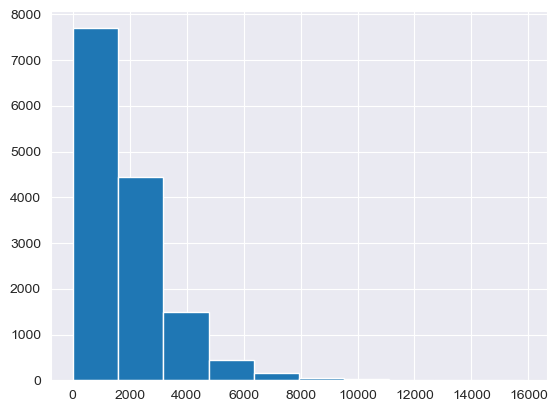

In [66]:
df.duration_minutes_drives.hist()

Text(0.5, 0, 'total_sessions')

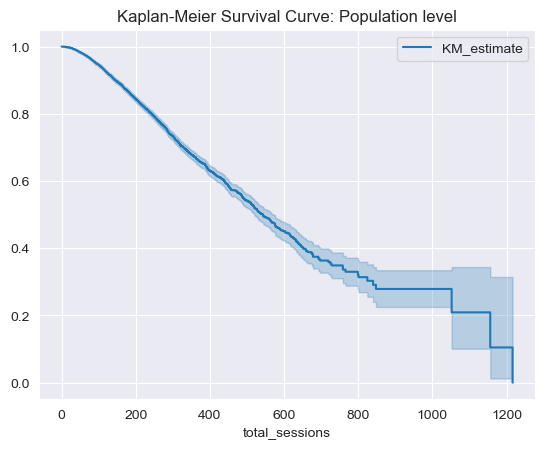

In [91]:
T=df['total_sessions']
C=df['label'].astype(float)
kmf.fit(T,C)
ax= kmf.plot(title='Kaplan-Meier Survival Curve: Population level')
ax.set_xlabel('total_sessions')

Text(0.5, 0, 'sessions')

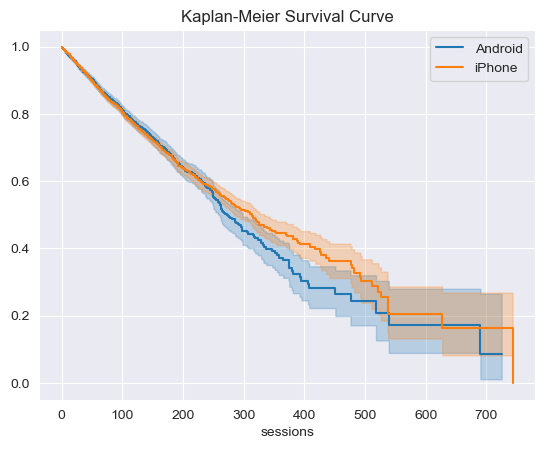

In [92]:
ax = plt.subplot(111)
And=df[df['device']=='Android']
iph = df[df['device']=='iPhone']
kmf = KaplanMeierFitter()
cat = 'sessions'
T=And[cat]
#True if the the death was observed
C=And['label'].astype(float)
kmf.fit(T,C)
ax=kmf.plot(title='Kaplan-Meier Survival Curve', label = "Android")
T=iph[cat]
C=iph['label'].astype(float)
kmf.fit(T,C)
kmf.plot(title='Kaplan-Meier Survival Curve',label = "iPhone",ax=ax)
ax.set_xlabel('sessions')

We see that in the region between 300 to 500 sessions Android users are more likely to churn compared to iPhone users


Text(0.5, 0, 'sessions')

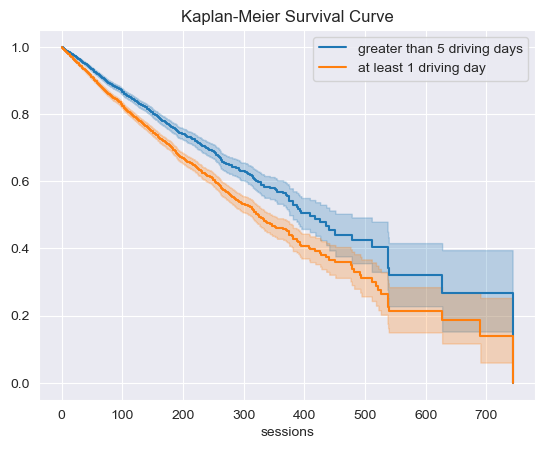

In [93]:
ax = plt.subplot(111)
column_name = 'driving_days'
And = df[df[ column_name]>5]
iph = df[df[ column_name]>0]
kmf = KaplanMeierFitter()
cat = 'sessions'
T=And[cat]
C=And['label'].astype(float)
kmf.fit(T,C)
ax = kmf.plot(title='Kaplan-Meier Survival Curve', label = "greater than 5 driving days")
T=iph[cat]
C=iph['label'].astype(float)
kmf.fit(T,C)
ax = kmf.plot(title='Kaplan-Meier Survival Curve',label = "at least 1 driving day")
ax.set_xlabel('sessions')

Expected number of sessions is the area under survival curve, so this result is easily predicted as number of session correlate with number of driving days.

Text(0.5, 0, 'sessions')

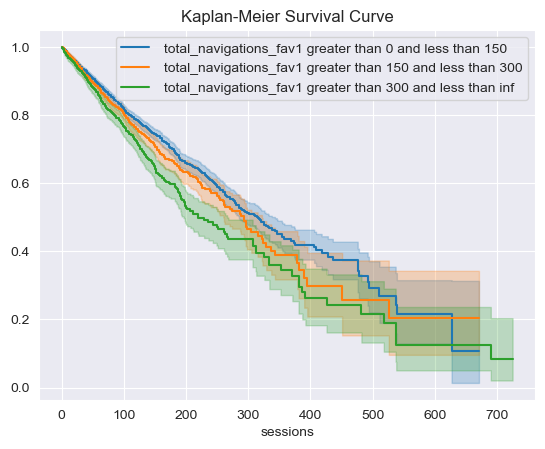

In [95]:
ax = plt.subplot(111)
column_name = 'total_navigations_fav1'
values = [150,300]
values.insert(0,0)
values.insert(len(values),np.infty)
values = [[values[i],values[i+1]] for i in range(len(values)-1)]
data = []
for val in values:
    dfr = df[df[ column_name]>val[0]]
    dfr = dfr[dfr[ column_name]<val[1]]
    kmf = KaplanMeierFitter()
    cat = 'sessions'
    T=dfr[cat]
    C=dfr['label'].astype(float)
    kmf.fit(T,C)
    kmf.plot(title='Kaplan-Meier Survival Curve', label = f" {column_name} greater than {val[0]} and less than {val[1]}",ax=ax)
ax.set_xlabel('sessions')

Text(0.5, 0, 'sessions')

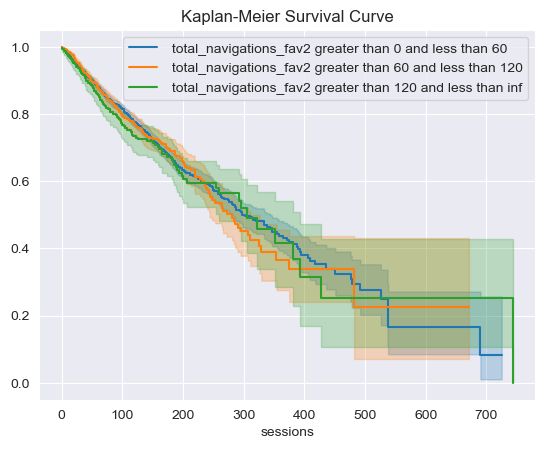

In [96]:
ax = plt.subplot(111)
column_name = 'total_navigations_fav2'
values = [60,120]
values.insert(0,0)
values.insert(len(values),np.infty)
values = [[values[i],values[i+1]] for i in range(len(values)-1)]
data = []
for val in values:
    dfr = df[df[ column_name]>val[0]]
    dfr = dfr[dfr[ column_name]<val[1]]
    kmf = KaplanMeierFitter()
    cat = 'sessions'
    T=dfr[cat]
    C=dfr['label'].astype(float)
    kmf.fit(T,C)
    kmf.plot(title='Kaplan-Meier Survival Curve', label = f" {column_name} greater than {val[0]} and less than {val[1]}",ax=ax)
ax.set_xlabel('sessions')

We see that a client is more likely to churn the more he navigates to his favoured location. The churn rate is unaffected by the quantity of visits to the second preferred location.

In [70]:
df['activity_days'][14]

0

In [82]:
df.to_csv('waze_dataset_no_nans_outlier_to_95th_p.csv')

### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Also, EDA has revealed:
* users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about
* there are discrepancies and mistakes in the data, e.g. inconsistent max values of 30/31 days for columns `activity_days` and `driving_days`, also impossibly large maximum value of `driven_km_drives` (that was over half the circumferene of the earth). It would be helpful to get more precise and clear data
* it would be tremendously beneficial to understand the methodology behind "churn": how many days of not using the app to consider the user churned? How does it correlate with `activity_days`?
    > Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app


In [39]:
df.groupby('ID')['driving_days']

In [51]:
data

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,cohort,sessions_bins
0,0,0.0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,driving_days15 - 20,299
1,1,0.0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,driving_days10 - 15,149
2,2,0.0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,driving_days5 - 10,149
3,3,0.0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,driving_days0 - 5,99
4,4,0.0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,driving_days15 - 20,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,14992,0.0,112,90,267.040136,1283,14,0,1525.932143,1116.650478,5,5,iPhone,driving_days5 - 10,149
14994,14994,0.0,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,driving_days15 - 20,99
14995,14995,0.0,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,driving_days20 - 25,49
14996,14996,0.0,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,driving_days15 - 20,299


In [26]:
drive_days_bins = np.arange(7)*5
sessions_bins = np.arange(20)*50-1
name = 'driving_days'
labels = [f'{name}{drive_days_bins[i]} - {drive_days_bins[i+1]}' for i in range(len(drive_days_bins)-1)]
datasets = {'churn':df[df['label']==0],"retain":df[df['label']==1]}
for data in datasets.values():
    data['cohort'] = pd.cut(data[name], bins=drive_days_bins, labels=labels, right=False)
    data['sessions_bins']=pd.cut(data['sessions'], bins=sessions_bins, labels=sessions_bins[1:], right=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_1596\3249710126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cohort'] = pd.cut(data[name], bins=drive_days_bins, labels=labels, right=False)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1596\3249710126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sessions_bins']=pd.cut(data['sessions'], bins=sessions_bins, labels=sessions_bins[1:], right=False)
C:\Users\Acer\AppData\Local\Temp\ipykernel_1596\3249710126.py:7: SettingWithCopyWarning: 
A value 

In [34]:
df_cohort['retain']

,cohort,sessions_bins,Unique Customers,Sum_Customers_Higher_Sessions
0,driving_days0 - 5,49,496,1114
1,driving_days0 - 5,99,271,618
2,driving_days0 - 5,149,147,347
3,driving_days0 - 5,199,89,200
4,driving_days0 - 5,249,43,111
...,...,...,...,...
109,driving_days25 - 30,749,0,0
110,driving_days25 - 30,799,0,0
111,driving_days25 - 30,849,0,0
112,driving_days25 - 30,899,0,0


In [90]:
df_cohort = {'churn':[],"retain":[]}
for key,value in datasets.items():
    df_cohort[key] = value.groupby(['cohort', 'sessions_bins'])['ID'].nunique().reset_index(name='Unique Customers')
    df_cohort[key]['Sum_Customers_Higher_Sessions'] = 0
#Iterate over each cohort group
    for cohort in df_cohort[key]['cohort'].unique():
        # Filter the DataFrame for the current cohort
        cohort_df = df_cohort[key][df_cohort[key]['cohort'] == cohort].copy()

        # For each sessions_bin within the cohort, sum the unique customers from higher sessions_bins
        for sessions_bin in cohort_df['sessions_bins'].unique():
            # The sum of unique customers for higher sessions_bins
            sum_higher = cohort_df[cohort_df['sessions_bins'] >= sessions_bin]['Unique Customers'].sum()
            # Assign this sum to the corresponding rows in the original DataFrame
            df_cohort[key].loc[(df_cohort[key]['cohort'] == cohort) & (df_cohort[key]['sessions_bins'] == sessions_bin), 'Sum_Customers_Higher_Sessions'] = sum_higher


C:\Users\Acer\AppData\Local\Temp\ipykernel_1596\1653078767.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cohort[key] = value.groupby(['cohort', 'sessions_bins'])['ID'].nunique().reset_index(name='Unique Customers')
C:\Users\Acer\AppData\Local\Temp\ipykernel_1596\1653078767.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cohort[key] = value.groupby(['cohort', 'sessions_bins'])['ID'].nunique().reset_index(name='Unique Customers')


In [50]:
cohort_pivot=df_cohort['retain'].pivot_table(index='cohort', columns='sessions_bins', values='Sum_Customers_Higher_Sessions')
cohort_pivot_2=df_cohort['churn'].pivot_table(index='cohort', columns='sessions_bins', values='Sum_Customers_Higher_Sessions')
cohort_pivot_3=df_cohort['churn'].pivot_table(index='cohort', columns='sessions_bins', values='Unique Customers')

cohort_size = cohort_pivot.iloc[:, 0]


In [62]:
hazard = 1-cohort_pivot_3/(cohort_pivot_2+cohort_pivot)

<Axes: xlabel='sessions_bins', ylabel='driving_days5 - 10'>

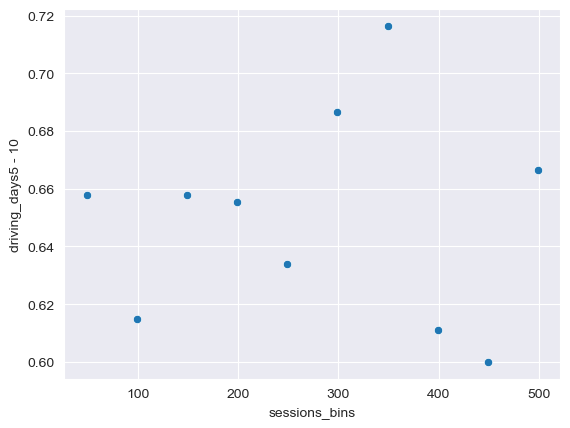

In [85]:
sns.scatterplot(hazard.iloc[1][:10])

In [64]:
hazard.cumprod(axis=1)

sessions_bins,49,99,149,199,249,299,349,399,449,499,549,599,649,699,749,799,849,899,949
cohort,,,,,,,,,,,,,,,,,,,
driving_days0 - 5,0.699190,0.479877,0.333540,0.240119,0.175087,0.141927,0.096009,0.081008,0.066279,0.044186,0.029457,0.029457,0.029457,0.029457,0.00000,NaN,NaN,NaN,NaN
driving_days5 - 10,0.657756,0.404467,0.266025,0.174359,0.110531,0.075873,0.054357,0.033218,0.019931,0.013287,0.010630,0.010630,0.010630,0.010630,0.01063,NaN,NaN,NaN,NaN
driving_days10 - 15,0.613274,0.372847,0.220319,0.141856,0.089115,0.065698,0.038324,0.023952,0.015569,0.012974,0.011352,0.011352,0.011352,0.000000,NaN,NaN,NaN,NaN,NaN
driving_days15 - 20,0.589470,0.339586,0.189157,0.114395,0.071864,0.041920,0.020665,0.010332,0.003229,0.003229,0.002153,0.001076,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
driving_days20 - 25,0.577957,0.332877,0.185962,0.105824,0.063067,0.033827,0.020177,0.013056,0.007834,0.007050,0.004700,0.000940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
driving_days25 - 30,0.590347,0.344793,0.181539,0.095547,0.055389,0.034618,0.023079,0.010097,0.002885,0.001442,0.001442,0.001442,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
cohort_pivot.divide(cohort_size, axis=0)

sessions_bins,49,99,149,199,249,299,349,399,449,499,549,599,649,699,749,799,849,899,949
cohort,,,,,,,,,,,,,,,,,,,
0-5 days,1.0,0.554758,0.311490,0.179533,0.099641,0.061041,0.026032,0.013465,0.008977,0.006284,0.002693,0.000898,0.000898,0.000898,0.000000,0.0,0.0,0.0,0.0
6-10 days,1.0,0.578176,0.301303,0.179153,0.100977,0.061889,0.039088,0.019544,0.008143,0.008143,0.006515,0.003257,0.003257,0.001629,0.001629,0.0,0.0,0.0,0.0
11-15 days,1.0,0.572139,0.355721,0.213930,0.116915,0.092040,0.049751,0.027363,0.014925,0.012438,0.007463,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
16-20 days,1.0,0.628000,0.356000,0.180000,0.100000,0.040000,0.016000,0.012000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
21-25 days,1.0,0.539062,0.328125,0.179688,0.117188,0.054688,0.039062,0.039062,0.023438,0.007812,0.007812,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
26-30 days,1.0,0.535714,0.285714,0.071429,0.035714,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [15]:
#df['label']=df['label'].map({'retained': 0, 'churned': 1})
df.drop(columns =['device']).corr()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
ID,1.000000,0.004425,0.012516,0.011741,0.005986,-0.005300,-0.000560,0.000153,-0.002123,-0.000181,-0.000891,-0.000981
label,0.004425,1.000000,0.038045,0.038548,0.025046,-0.129263,0.055537,0.020051,0.019050,0.035678,-0.303851,-0.294259
sessions,0.012516,0.038045,1.000000,0.996843,0.590265,0.006441,0.005252,0.005220,0.003815,-0.005800,0.024594,0.020228
drives,0.011741,0.038548,0.996843,1.000000,0.588118,0.006001,0.004551,0.006896,0.003708,-0.005376,0.024324,0.019975
total_sessions,0.005986,0.025046,0.590265,0.588118,1.000000,0.006180,-0.000047,0.007659,0.001690,-0.001457,0.012932,0.009798
n_days_after_onboarding,-0.005300,-0.129263,0.006441,0.006001,0.006180,1.000000,-0.004536,-0.006433,-0.005056,-0.010715,-0.009418,-0.007321
total_navigations_fav1,-0.000560,0.055537,0.005252,0.004551,-0.000047,-0.004536,1.000000,0.003734,-0.006262,0.005619,0.010318,0.010024
total_navigations_fav2,0.000153,0.020051,0.005220,0.006896,0.007659,-0.006433,0.003734,1.000000,0.000159,-0.005326,-0.004836,0.000938
driven_km_drives,-0.002123,0.019050,0.003815,0.003708,0.001690,-0.005056,-0.006262,0.000159,1.000000,0.697977,-0.004196,-0.007099
duration_minutes_drives,-0.000181,0.035678,-0.005800,-0.005376,-0.001457,-0.010715,0.005619,-0.005326,0.697977,1.000000,-0.003898,-0.006239


In [39]:
%matplotlib qt
#plt.scatter(df['driven_km_drives'],df['duration_minutes_drives'],c=df['label'])
plt.scatter(df['sessions'],df['sessions']/df['drives'],c=df['label'])


In [72]:
import seaborn as sns
data = df.apply(lambda x: x['sessions']/x['drives'] if (x['drives'] != 0 and x['sessions'] != 0) else np.nan,axis=1)
df['mean_ses']= data
df=df.dropna()
fig,ax=plt.subplots(1,1)
bins= np.arange(25)*0.01+1
sns.histplot(df[df['label']==0]['mean_ses'],stat='probability',ax=ax,bins=bins)
sns.histplot(df[df['label']==1]['mean_ses'],stat='probability',ax=ax,bins=bins)


C:\Users\Acer\anaconda3\envs\Nastya_data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\Nastya_data_analysis\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mean_ses', ylabel='Probability'>

We see that P(survive|churn,n driving_days) does not depend on number of driving days